# Forward Forward Implementation on Titanic
By: Elston Tan

In [4]:
#imports
import numpy as np
import random 
import pandas as pd 
import torch 
import sklearn.metrics as metrics 
from sklearn.model_selection import train_test_split
import sklearn
import torchvision.transforms as T 
from tqdm import tqdm 
import torchvision
import seaborn as sns
import matplotlib.pyplot as plt

c:\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Looking at the data

In [5]:
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

In [6]:
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Feature Engineering

### Brief Description of Train and Test datasets

In [7]:
print(train.describe())
print(len(train))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
891


In [8]:
print(test.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


#### Looking at na values

In [9]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
print(train["Cabin"].value_counts())

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


In [11]:
train.drop(["Cabin"], axis=1, inplace=True)
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


In [12]:
print(train["Age"].unique())

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


In [13]:
print(train["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [14]:
#train.dropna(how="any", axis=0, inplace=True, subset=["Age"]) 
train['Age'] = train['Age'].fillna(train['Age'].mean()) # reduces overfitting
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [15]:
train.dropna(axis=0, inplace=True, subset=["Embarked"], how="any")
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [16]:
print(len(train))

889


### Visualizing Columns of Train Dataset

##### Visualizing The Value Counts of Embarked Col

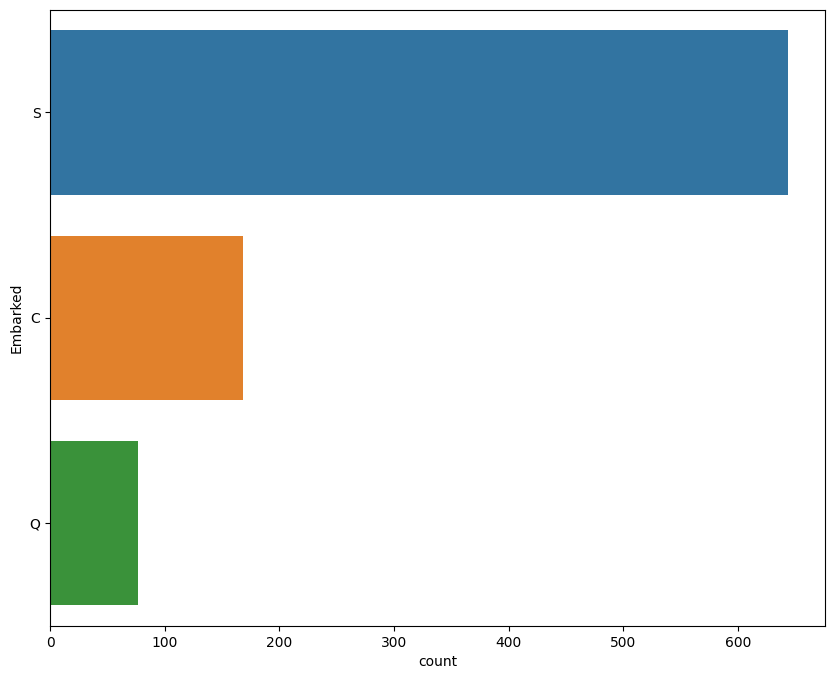

In [17]:
plt.figure(figsize=(10, 8))
sns.countplot(data=train, y="Embarked", order=train['Embarked'].value_counts().index[0:115])
plt.show()

##### Visualizing Survived Col

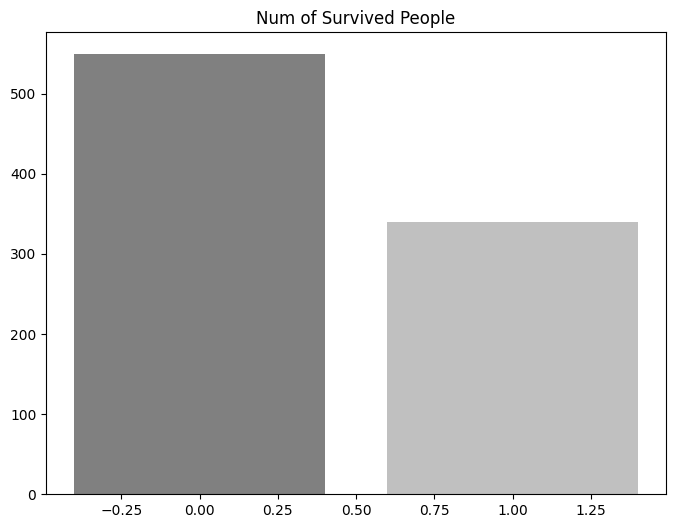

In [18]:
plt.figure(figsize=(8,6))
plt.bar(list(train['Survived'].value_counts().keys()), list(train['Survived'].value_counts()), color=('grey', 'silver'))
plt.title("Num of Survived People")
plt.show()

##### Checking The Distribution of All Columns

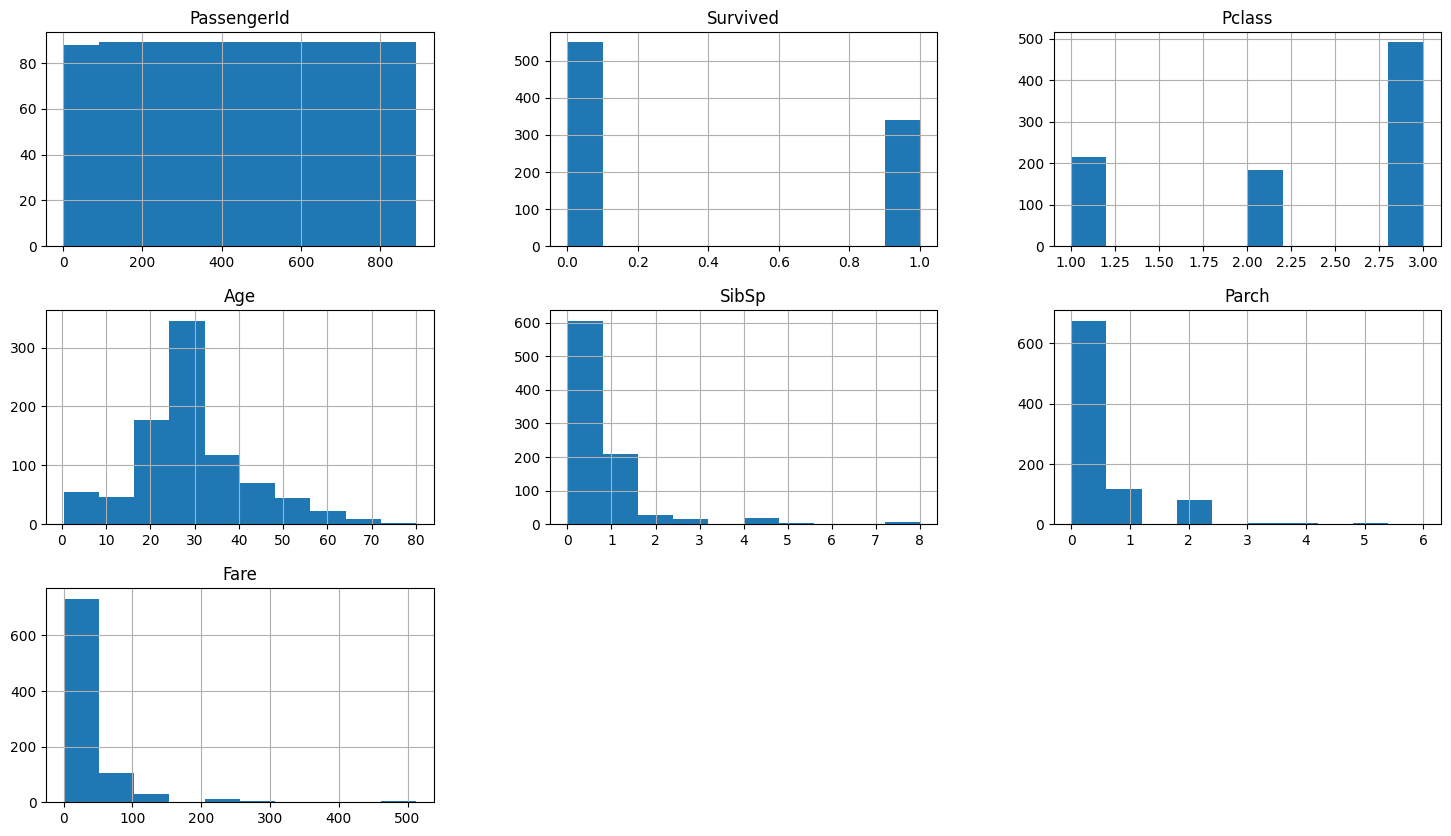

In [19]:
train.hist(figsize=(18, 10))
plt.show()

##### Looking At The Relation of Columns and Survivability

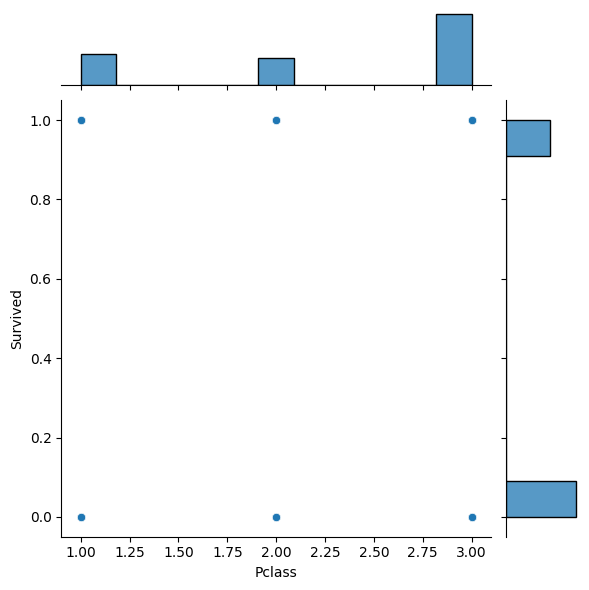

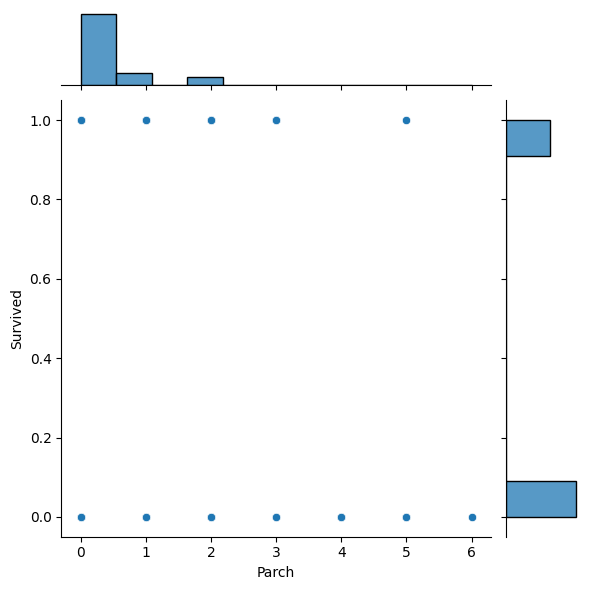

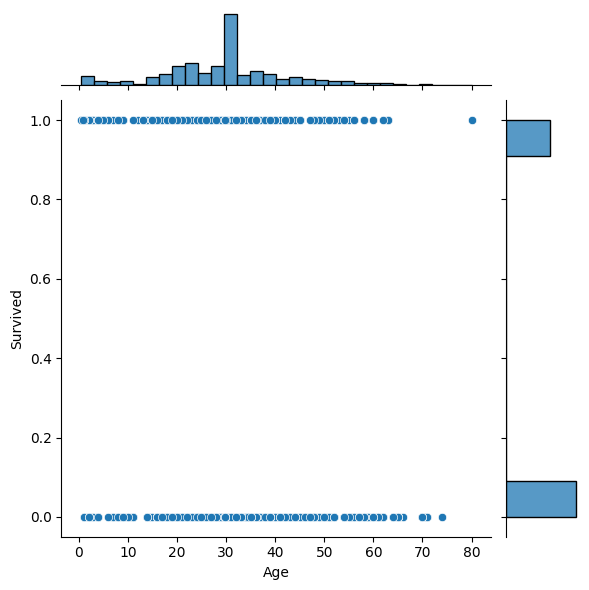

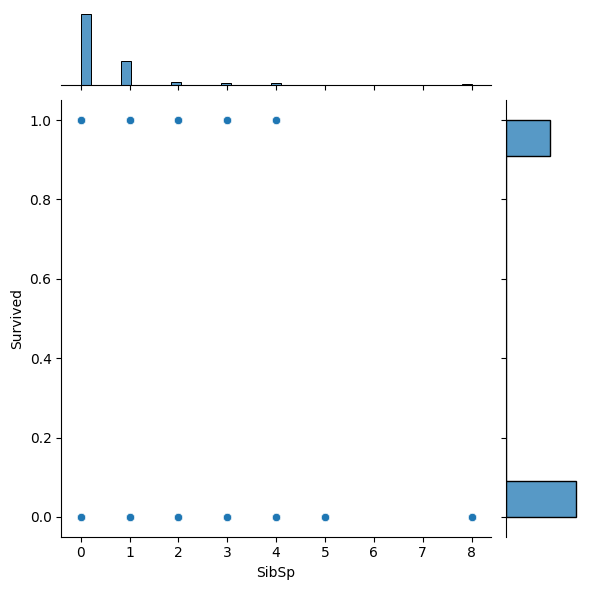

In [20]:
sns.jointplot(data=train, x='Pclass', y='Survived')
sns.jointplot(data=train, x='Parch', y='Survived')
sns.jointplot(data=train, x='Age', y='Survived')
sns.jointplot(data=train, x='SibSp', y='Survived')

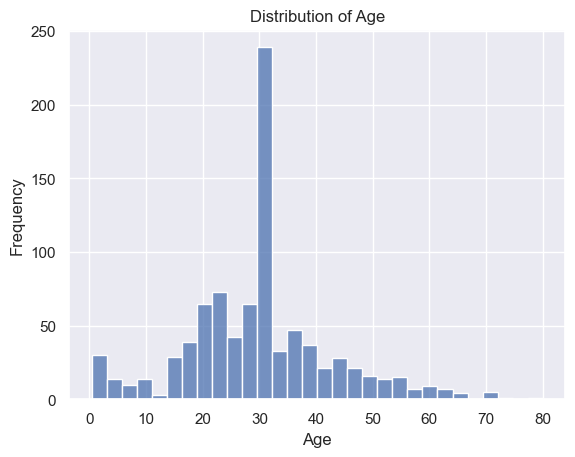

In [21]:
sns.set()
sns.histplot(data=train, x="Age")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

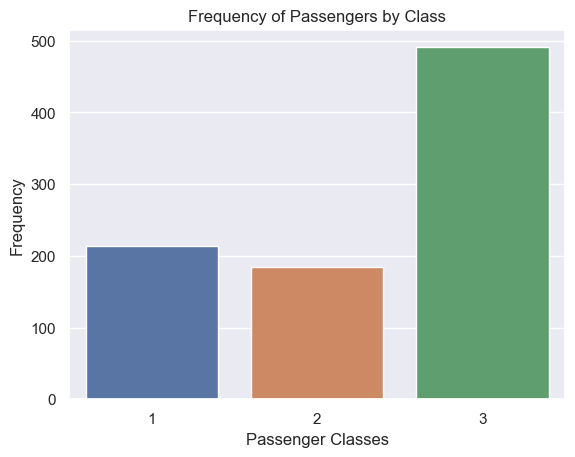

In [22]:
sns.countplot(data=train, x="Pclass")
plt.title("Frequency of Passengers by Class")
plt.xlabel("Passenger Classes")
plt.ylabel("Frequency")
plt.show()

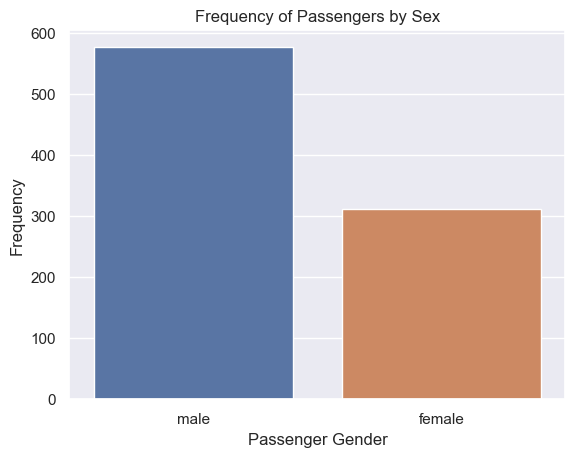

In [23]:
sns.set()
sns.countplot(data=train, x="Sex")
plt.title("Frequency of Passengers by Sex")
plt.xlabel("Passenger Gender")
plt.ylabel("Frequency")
plt.show()

#### Relation Between Survivability and Other Factors

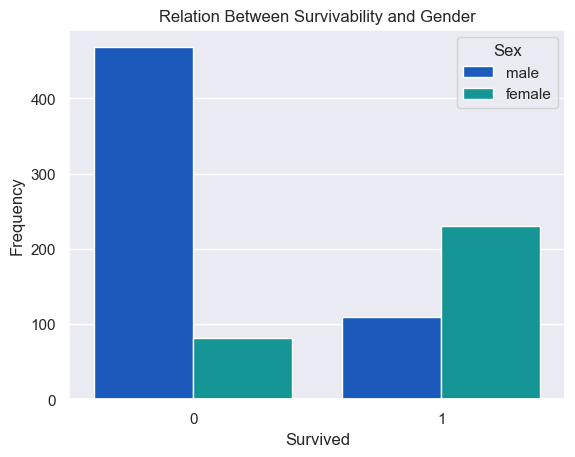

In [24]:
sns.countplot(data=train, x="Survived", hue='Sex', palette="winter")
plt.title("Relation Between Survivability and Gender")
plt.xlabel("Survived")
plt.ylabel("Frequency")
plt.show()

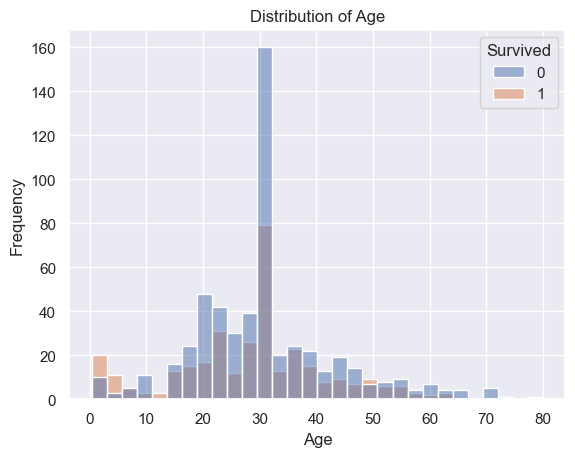

In [25]:
sns.histplot(data=train, x="Age", hue="Survived")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

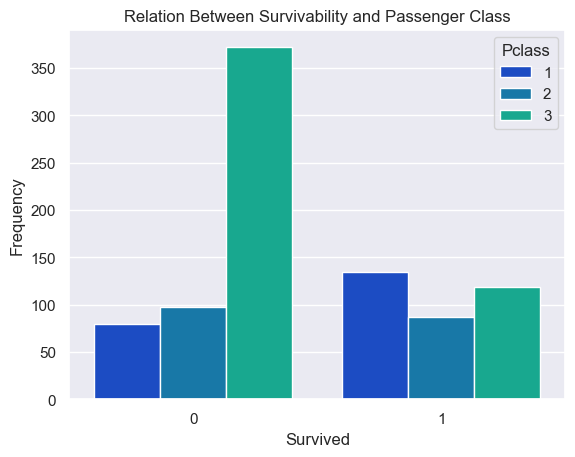

In [26]:
sns.countplot(data=train, x="Survived", hue='Pclass', palette="winter")
plt.title("Relation Between Survivability and Passenger Class")
plt.xlabel("Survived")
plt.ylabel("Frequency")
plt.show()

In [27]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


#### Checking For Test Dataset And Cleaning It Now

In [28]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [29]:
test.drop(["Cabin"], axis=1, inplace=True)
print(test.isnull().sum())

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64


In [30]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

#### Fitting The Label Encoder and Transforming Train and Test Data Sex Column

In [31]:
labelEncoder = sklearn.preprocessing.LabelEncoder()
labelEncoder.fit(train["Sex"].unique())
train["Sex"] = labelEncoder.transform(train["Sex"])
print(train.head())
test["Sex"] = labelEncoder.transform(test["Sex"])
print(test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S  
   PassengerId  Pclass                                  

#### Removing Unnesseccary Columns

In [32]:
#looking at column datatypes
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


#### Correcting column dtypes

In [33]:
train["Age"] = train["Age"].astype("int")


In [34]:
# looking at number of unique values for ticket column
print(len(train["Ticket"].unique()))

680


In [35]:
train.drop(["Ticket"], axis=1, inplace=True)
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')


In [36]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')


##### Cleaning Irrelevant Columns

In [37]:
train.drop(["Name", "PassengerId"], axis=1, inplace=True)
print(train.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


##### Label Encoding Object Types For Train/Test Datasets

In [38]:
strings = train.select_dtypes(include=('object')).columns
for col in strings:
    train[col] = labelEncoder.fit_transform(train[col].astype('str'))
    try:
        test[col] = labelEncoder.transform(test[col].astype('str'))
    except:
        test[col] = labelEncoder.fit_transform(test[col].astype('str'))


In [39]:
y = train[["Survived"]]
x = train.drop(["Survived"], axis=1)


In [40]:
x.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.127741,-0.331685,0.081656,0.016824,-0.548193,0.164681
Sex,0.127741,1.000000,0.087839,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.331685,0.087839,1.000000,-0.231992,-0.175770,0.090885,-0.025105
SibSp,0.081656,-0.116348,-0.231992,1.000000,0.414542,0.160887,0.068900
Parch,0.016824,-0.247508,-0.175770,0.414542,1.000000,0.217532,0.040449
Fare,-0.548193,-0.179958,0.090885,0.160887,0.217532,1.000000,-0.226311
Embarked,0.164681,0.110320,-0.025105,0.068900,0.040449,-0.226311,1.000000


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33)

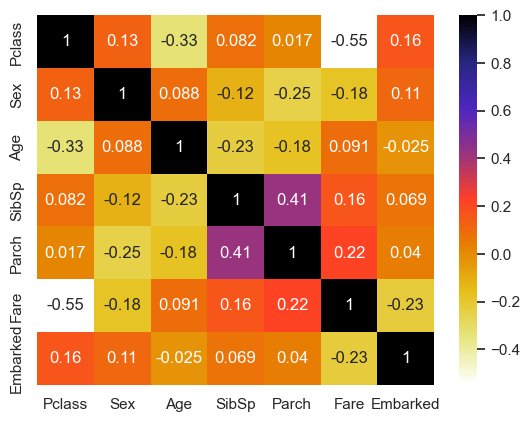

In [42]:
sns.heatmap(x.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

##### Define FFA

In [43]:
import random
import numpy as np


def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def norm(x, p=2, dim=-1, keepdims=True):
    return (x ** p).sum(axis=dim, keepdims=keepdims)


class FullyConnected:
    
    def __init__(self, in_dim, out_dim, do_norm=True, constant=1.0):
        k = np.sqrt(1.0 / in_dim)
        self._W = np.random.uniform(-k, k, (in_dim, out_dim))
        self._b = np.random.uniform(-k, k, out_dim)
        self._c = constant
        self._gradW, self._gradb = 0.0, 0.0
        self._do_normalize = do_norm
        self._samples = 0.0
        self.training = True

    @property
    def training(self):
        return self._is_training

    @training.setter
    def training(self, mode):
        assert isinstance(mode, bool)
        self._is_training = mode

    def __call__(self, X):
        return self.forward(X)

    def _normalize(self, X, epsilon=1e-9):
        """
        normalize the inputs from previous layers
        Math: X / ||X||_2
        Ref: ``To prevent this, FF normalizes the length of the
               hidden vector before using it as input to the
               next layer.``
        """
        return X / (epsilon + norm(X, keepdims=True) ** 0.5)

    def goodness(self, H):
        """
        compute the goodness score.
        Math: \sum_{d=1}^D H_d
        Ref: ``Let us suppose that the goodness function for a layer
               is simply the sum of the squares of the activities of
               the rectified linear neurons in that layer.``
        """
        return norm(H)

    def _backward(self, x, h):
        if self.training:
            self._samples += x.shape[0]
            y = sigmoid(self.goodness(h) - self._c)
            grad_y = y * (1 - y)
            grad_h = 2 * grad_y.reshape(-1, 1) * h
            self._gradW += x.T @ grad_h        # (indim, outdim)
            self._gradb += grad_h.sum(axis=0)  # (outdim,)

    def _transform(self, X):
        assert X.shape[-1] == self._W.shape[0]
        return np.maximum(X @ self._W + self._b, 0)

    def forward(self, X):
        if self._do_normalize:
            X = self._normalize(X)
        h = self._transform(X)
        self._backward(X, h)
        return h

    def update(self, is_positive, learning_rate):
        assert isinstance(is_positive, bool)
        sign = 1.0 if is_positive else -1.0
        self._W += sign * learning_rate * self._gradW / self._samples
        self._b += sign * learning_rate * self._gradb / self._samples
        self._gradW, self._gradb, self._samples = 0.0, 0.0, 0.0
        

class ForwardForwardClassifier:
    
    name = "ForwardForwardNetwork"
    
    def __init__(self, in_dim, hide_dim, out_dim, n_layers=2):
        assert n_layers >= 1
        self._dims = (in_dim, hide_dim, out_dim)
        self.layers = [FullyConnected(in_dim + out_dim, hide_dim, False)]
        for layer in range(1, n_layers):
            self.layers.append(FullyConnected(hide_dim, hide_dim, True))

    def forward(self, X):
        for layer in self.layers:
            X = layer(X)
        return layer.goodness(X)

    def train_step(self, positive, negative, learning_rate, n_iters=5):
        for layer in self.layers:
            for niter in range(n_iters):
                layer(positive)
                layer.update(is_positive=True, learning_rate=learning_rate)
                layer(negative)
                layer.update(is_positive=False, learning_rate=learning_rate)
            positive = layer(positive)
            negative = layer(negative)

    def fit(self, X, Y, learn_rate=5e-4, batch_size=32, epochs=10000, log_freq=1000):
        from time import time
        from sklearn.metrics import accuracy_score
        Y = Y.astype(np.int32)
        self._labels = ylist = set(Y.tolist())
        assert len(ylist) <= self._dims[-1]
        assert all((isinstance(y, int) for y in ylist)), "labels should be integers"
        assert all((0 <= y < self._dims[-1] for y in ylist)), "labels should fall between 0 and %d" % (self._dims[-1],)

        begin = time()
        for epoch in range(epochs):
            self.training = True
            for y in ylist:
                subY = list(ylist - {y})
                subX = X[Y == y]
                for batch in self._generate_batches(subX, batch_size):
                    real_y = np.zeros((len(batch), len(ylist)))
                    real_y[:, y] = 1
                    fake_y = np.zeros((len(batch), len(ylist)))
                    fake_y[range(len(batch)), random.choices(subY, k=len(batch))] = 1
                    self.train_step(positive=np.hstack([batch, real_y]),
                                    negative=np.hstack([batch, fake_y]),
                                    learning_rate=learn_rate)

            self.training = False
            Yhat = self.predict(X, batch_size)
            if epoch % log_freq == 0:
                acc = accuracy_score(Y, Yhat)
                print("Epoch-%d | Spent=%.4f | Train Accuracy=%.4f" % (epoch, time() - begin, acc))
                begin = time()

    def predict_proba(self, X, batch_size=32):
        Yhat = []
        for batch in self._generate_batches(X, batch_size):
            batch_yhat = []
            for y in self._labels:
                temp_y = np.zeros((len(batch), len(self._labels)))
                temp_y[:, y] = 1
                pred_y = self.forward(np.hstack([batch, temp_y]))
                batch_yhat.append(pred_y.reshape(-1, 1))
            Yhat.append(np.hstack(batch_yhat))
        return np.vstack(Yhat)
                
    def predict(self, X, batch_size=32):
        return np.argmax(self.predict_proba(X, batch_size), -1)

    def _generate_batches(self, X, batch_size=32):
        batch = []
        for sample in X:
            batch.append(sample)
            if len(batch) == batch_size:
                yield np.vstack(batch)
                batch.clear()
        if len(batch) > 0:
            yield np.vstack(batch)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf = RandomForestClassifier(max_depth=6,
                            random_state=5)
rf.fit(x_train, y_train)
predy = rf.predict(x_test)
rf.score(x_test, y_test)
metrics.confusion_matrix(predy, y_test)

C:\Users\elsto\AppData\Local\Temp\ipykernel_23744\1964260761.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


array([[168,  42],
       [  8,  76]], dtype=int64)

In [45]:
print(x_train)

     Pclass  Sex  Age  SibSp  Parch      Fare  Embarked
870       3    1   26      0      0    7.8958         2
863       3    0   29      8      2   69.5500         2
302       3    1   19      0      0    0.0000         2
472       2    0   33      1      2   27.7500         2
334       1    0   29      1      0  133.6500         2
..      ...  ...  ...    ...    ...       ...       ...
671       1    1   31      1      0   52.0000         2
876       3    1   20      0      0    9.8458         2
136       1    0   19      0      2   26.2833         2
879       1    0   56      0      1   83.1583         0
341       1    0   24      3      2  263.0000         2

[595 rows x 7 columns]


In [46]:
def scoring(y_true, y_prob, threshold=0.5):
    """
    Inputs
    ------
    y_true : numpy.ndarray
        the target label sequence, where each element shold be 0 or 1
    y_prob : numpy.ndarray
        the same shape as `y_true` storing the predicted probability to the label `
    threshold : float (default=0.5)
    Outputs
    -------
    accuracy : float
    f1 : float
    roc_auc : float
    """
    assert y_true.shape == y_prob.shape
    assert len(y_true.shape) == len(y_prob.shape) == 1
    y_pred = np.where(y_prob >= threshold, 1.0, 0.0)
    return (metrics.accuracy_score(y_true, y_pred),
            metrics.f1_score(y_true, y_pred),
            metrics.roc_auc_score(y_true, y_prob))


def loading(root):
    data, labels = [], {}
    with open(root, encoding="utf8") as f:
        for row in f:
            if len(row) <= 1:
                break
            record = row.strip().split(",")
            record[:-1] = map(float, record[:-1])
            record[-1] = labels.setdefault(record[-1], len(labels))
            data.append(record)
    label_list = [_[0] for _ in sorted(labels.items(), key=lambda pair: pair[1])]
    return np.array(data, dtype=np.float32), label_list


def normalize(data):
    X, Y = data[:, :-1], data[:, -1:]
    mean, std = X.mean(axis=0), X.std(axis=0) + 1e-7
    return np.hstack([(X - mean) / std, Y])


def discretize(data):
    X, Y = data[:, :-1], data[:, -1:]
    mean = X.mean(axis=0)
    return np.hstack([np.where(X >= mean, 1.0, 0.0), Y])


def splitting(data, train_rate=0.7, seed=14):
    split = int(train_rate * len(data))
    np.random.seed(seed)
    np.random.shuffle(data)
    return (np.array(data[:split], dtype=np.float32),
            np.array(data[split:], dtype=np.float32))


##### Creating The Correct Format For DataFrame and Saving as CSV

In [47]:
train = pd.concat([x, y], axis=1)
for i in train.columns:
    if i == "Survived":
        continue 
    train[i] = train[i].astype('float')
train.to_csv("titanic.csv", index=False, header=False)

In [48]:
print(train)
print(train.dtypes)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       3.0  1.0  22.0    1.0    0.0   7.2500       2.0         0
1       1.0  0.0  38.0    1.0    0.0  71.2833       0.0         1
2       3.0  0.0  26.0    0.0    0.0   7.9250       2.0         1
3       1.0  0.0  35.0    1.0    0.0  53.1000       2.0         1
4       3.0  1.0  35.0    0.0    0.0   8.0500       2.0         0
..      ...  ...   ...    ...    ...      ...       ...       ...
886     2.0  1.0  27.0    0.0    0.0  13.0000       2.0         0
887     1.0  0.0  19.0    0.0    0.0  30.0000       2.0         1
888     3.0  0.0  29.0    1.0    2.0  23.4500       2.0         0
889     1.0  1.0  26.0    0.0    0.0  30.0000       0.0         1
890     3.0  1.0  32.0    0.0    0.0   7.7500       1.0         0

[889 rows x 8 columns]
Pclass      float64
Sex         float64
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked    float64
Survived      int64
dtype: object


##### Prepare Dataset Function

In [49]:
def prepare_dataset(filepath, do_normalize=False, do_discretize=False, train_rate=0.7):
    """
    Inputs
    ------
    filepath : str
        file path to the iris dataset
    discretize : bool (default=False)
        whether we discretize continue variables to 0.0 or 1.0
    normalize : bool (default=False)
        whether we normalize continue variables with mean=0.0, std=1.0
    train_rate : float (default=0.7)
        how much percent of samples belongs to training set (others will be test)
        
    Outputs
    -------
    train : numpy.array
        numerical dataset, where last dimension
        is the label dimension.
    test : numpy.array
        numerical dataset, where last dimension
        is the label dimension.
    label_names : list
        a list of string with label names
    """
    assert 0 <= train_rate <= 1.0
    data, label_names = loading(filepath)
    if do_normalize:
        data = normalize(data)
    if do_discretize:
        data = discretize(data)    
    train, test = splitting(data)
    return (train, test, label_names)

In [50]:
def pipeline(model, train, test):
    name = model.name
    trainX, trainY = train[:, :-1], train[:, -1]
    print("")
    print("Model: %s\n" % name + "-" * 40)
    model.fit(trainX, trainY)
    
    acc, f1, auc = scoring(trainY, model.predict(trainX))
    print("Train Accuracy=%.4f | F1=%.4f | AUC=%.4f" % (acc, f1, auc))

    acc, f1, auc = scoring(test[:, -1].astype(np.int32), model.predict(test[:, :-1]))
    print("Test Accuracy=%.4f | F1=%.4f | AUC=%.4f" % (acc, f1, auc))

In [51]:
print(train)
train, test2, labels = prepare_dataset("./titanic.csv", do_normalize=True)
print(test2)
model = ForwardForwardClassifier(in_dim=7, hide_dim=100, out_dim=2)
pipeline(model, train, test2)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       3.0  1.0  22.0    1.0    0.0   7.2500       2.0         0
1       1.0  0.0  38.0    1.0    0.0  71.2833       0.0         1
2       3.0  0.0  26.0    0.0    0.0   7.9250       2.0         1
3       1.0  0.0  35.0    1.0    0.0  53.1000       2.0         1
4       3.0  1.0  35.0    0.0    0.0   8.0500       2.0         0
..      ...  ...   ...    ...    ...      ...       ...       ...
886     2.0  1.0  27.0    0.0    0.0  13.0000       2.0         0
887     1.0  0.0  19.0    0.0    0.0  30.0000       2.0         1
888     3.0  0.0  29.0    1.0    2.0  23.4500       2.0         0
889     1.0  1.0  26.0    0.0    0.0  30.0000       0.0         1
890     3.0  1.0  32.0    0.0    0.0   7.7500       1.0         0

[889 rows x 8 columns]
[[ 0.8252083  -1.3599112  -0.19258754 ... -0.4220579   0.58684075
   1.        ]
 [-0.3735013  -1.3599112  -0.42384872 ... -0.10261257  0.58684075
   1.        ]
 [ 0.8252083  -1.35991

In [52]:
test.drop(["Ticket", "Name"], axis=1, inplace=True)
print(test)

     PassengerId  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0            892       3    1  34.50000      0      0    7.8292         1
1            893       3    0  47.00000      1      0    7.0000         2
2            894       2    1  62.00000      0      0    9.6875         1
3            895       3    1  27.00000      0      0    8.6625         2
4            896       3    0  22.00000      1      1   12.2875         2
..           ...     ...  ...       ...    ...    ...       ...       ...
413         1305       3    1  30.27259      0      0    8.0500         2
414         1306       1    0  39.00000      0      0  108.9000         0
415         1307       3    1  38.50000      0      0    7.2500         2
416         1308       3    1  30.27259      0      0    8.0500         2
417         1309       3    1  30.27259      1      1   22.3583         0

[418 rows x 8 columns]


In [55]:
newtest = []
finaltest = []
for index, row in test.iterrows():
    for i in row[1:]:
        newtest.append(i)
    finaltest.append(newtest)
    newtest = []
    
finaltest = np.array(finaltest)
print(finaltest)
        

[[ 3.          1.         34.5        ...  0.          7.8292
   1.        ]
 [ 3.          0.         47.         ...  0.          7.
   2.        ]
 [ 2.          1.         62.         ...  0.          9.6875
   1.        ]
 ...
 [ 3.          1.         38.5        ...  0.          7.25
   2.        ]
 [ 3.          1.         30.27259036 ...  0.          8.05
   2.        ]
 [ 3.          1.         30.27259036 ...  1.         22.3583
   0.        ]]


In [56]:
pred = model.predict(finaltest)
print(pred)

[0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 0 0 1 0 0 1 0 0 0]


In [65]:
import csv 
import csv  

header = ['PassengerId', 'Survived']

with open('submission.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for index, row in test.iterrows():
        data = [int(row["PassengerId"]), pred[index]]
        writer.writerow(data)
